<a href="https://colab.research.google.com/github/shareefat/machine-learning-/blob/main/Ecommerce_Customer_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('Ecommerce Customers.csv')
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [3]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [4]:
df.drop(['Email','Address','Avatar'],axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [6]:
df.isnull().sum()

,0
Avg. Session Length,0
Time on App,0
Time on Website,0
Length of Membership,0
Yearly Amount Spent,0


**visualization**

In [7]:
import seaborn as sns

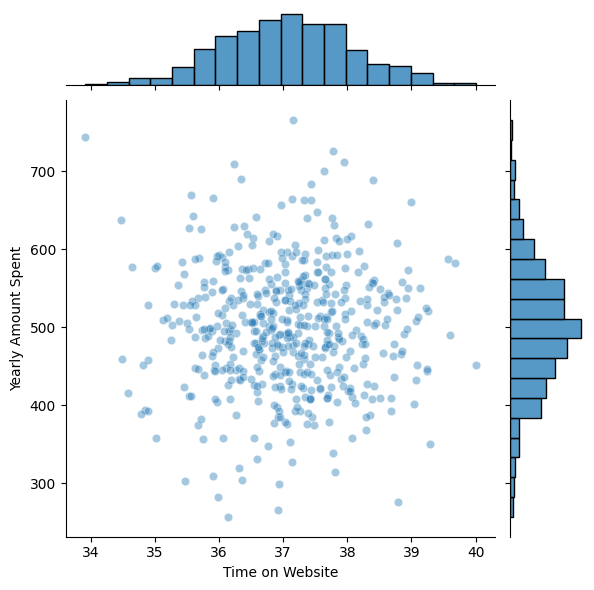

In [8]:
sns.jointplot(data=df, x='Time on Website', y='Yearly Amount Spent',alpha=0.4)

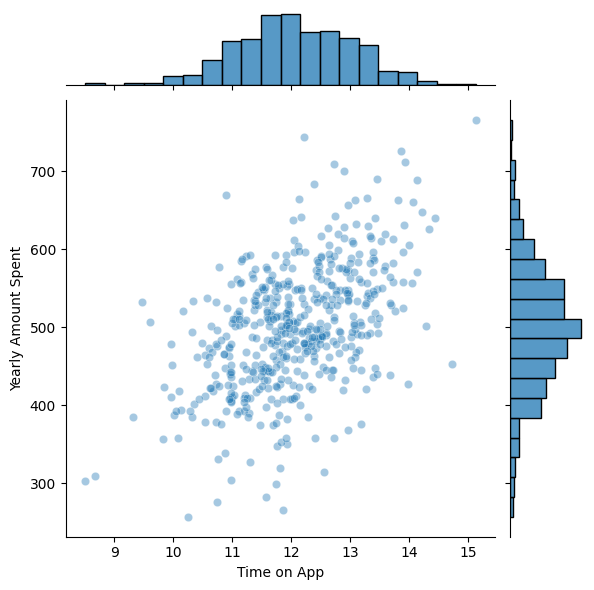

In [9]:
sns.jointplot(data=df, x='Time on App', y='Yearly Amount Spent',alpha=0.4)

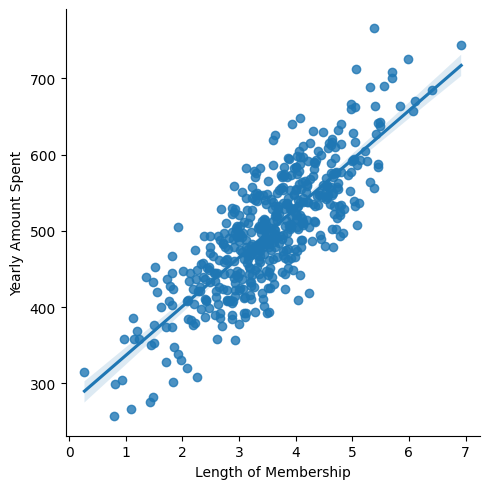

In [10]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)

**Training the Data**

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

**linearRegression Model**

In [14]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [15]:
lm.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

In [16]:
pdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coef'])
print(pdf)

                           Coef
Avg. Session Length   25.724256
Time on App           38.597135
Time on Website        0.459148
Length of Membership  61.674732


In [17]:
y_pred = lm.predict(X_test)
y_pred

array([403.66993069, 542.57756289, 427.06591658, 502.02460425,
       410.12143559, 569.93442508, 531.93431341, 506.29650969,
       408.71870658, 473.97737105, 441.46912726, 425.33703059,
       425.1297229 , 527.61676714, 431.45684016, 424.0769184 ,
       575.76543296, 484.89856554, 458.35936863, 481.96502182,
       502.32441491, 513.63783554, 507.58877002, 646.57464283,
       450.24372141, 496.27043415, 556.40457807, 554.95630839,
       399.64237199, 325.84623136, 532.89783259, 478.12238702,
       501.05701845, 305.97335848, 505.77244448, 483.79591969,
       518.8331528 , 438.18241857, 456.71094234, 471.04609461,
       494.44008972, 445.31155755, 508.78802753, 501.04594193,
       488.83499673, 535.38079541, 595.20129802, 514.04714872,
       280.76758312, 433.10112367, 421.70823427, 481.23640152,
       584.71372272, 608.7748096 , 563.98513427, 494.72804869,
       394.52133407, 456.4197529 , 573.08767515, 499.6984241 ,
       512.83277025, 392.12434043, 480.05057697, 481.54

In [18]:
lm.score(X,y)

0.9842821675307221

Text(0.5, 1.0, 'Y Test vs Predicted Y')

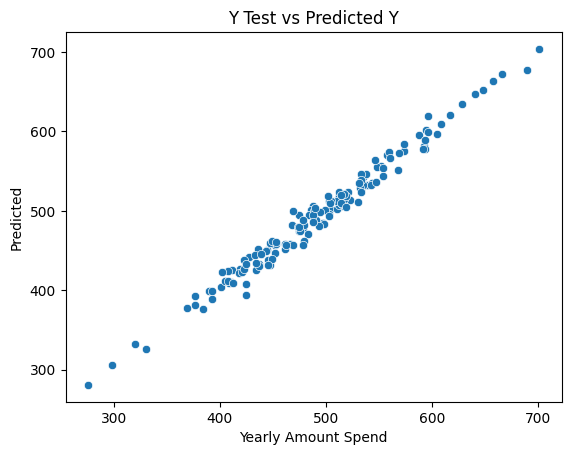

In [19]:
import seaborn as sns
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Yearly Amount Spend')
plt.ylabel('Predicted')
plt.title('Y Test vs Predicted Y')

Random Forest

In [20]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [21]:
y_pred = rf.predict(X_test)
y_pred

array([410.25855615, 541.41151825, 467.59120521, 505.52449896,
       426.86460336, 561.64248845, 528.44910637, 503.24547461,
       412.14695756, 458.45815699, 444.23380468, 420.17352115,
       439.56829472, 543.8452552 , 429.37524832, 422.27779216,
       577.50319344, 480.90953225, 463.97982097, 465.15758405,
       467.94901175, 525.09720109, 505.06636202, 622.03819521,
       431.11466891, 502.66165206, 538.60935299, 560.70801291,
       402.52290273, 347.70312909, 548.90992342, 483.6162614 ,
       502.4308762 , 318.22393973, 514.109635  , 482.04736766,
       522.49295996, 439.5174607 , 455.25221335, 474.30379222,
       490.44098072, 419.95242711, 507.44766748, 496.45174632,
       490.21580656, 542.9718904 , 578.30157793, 521.44884446,
       325.86523322, 441.06592266, 425.64694354, 483.4613819 ,
       584.47360583, 609.46908   , 562.42776257, 502.29119948,
       387.99220218, 417.31231204, 564.47773373, 504.99159682,
       508.51718031, 379.94807513, 481.12649175, 488.22

In [22]:
rf.score(X,y)

0.9799095762997272

mean_squared error & r2 Score

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared: ", r2)

Mean Squared Error: 292.94419222893845
R-squared:  0.9460876230788762


Mean Square error :
calculate the average squared difference between actual value (y_test) and predicted value (y_pred)

R-square :
measure how well the prediction fit the actual data

**DECISION TREE**

In [29]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_leaf_nodes=10)
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

In [30]:
y_pred = dt.predict(X_test)
y_pred

array([419.68604089, 582.29728   , 493.90223026, 521.52511755,
       419.68604089, 582.29728   , 476.02244911, 493.90223026,
       419.68604089, 493.90223026, 476.02244911, 419.68604089,
       476.02244911, 562.64308874, 419.68604089, 419.68604089,
       582.29728   , 476.02244911, 476.02244911, 493.90223026,
       419.68604089, 476.02244911, 521.52511755, 582.29728   ,
       419.68604089, 493.90223026, 535.86412674, 562.64308874,
       419.68604089, 357.77686161, 562.64308874, 476.02244911,
       476.02244911, 357.77686161, 493.90223026, 476.02244911,
       493.90223026, 476.02244911, 476.02244911, 476.02244911,
       419.68604089, 438.65037244, 476.02244911, 493.90223026,
       521.52511755, 535.86412674, 582.29728   , 562.64308874,
       357.77686161, 438.65037244, 419.68604089, 521.52511755,
       535.86412674, 582.29728   , 582.29728   , 419.68604089,
       357.77686161, 438.65037244, 562.64308874, 535.86412674,
       521.52511755, 357.77686161, 493.90223026, 476.02

In [31]:
dt.score(X,y)

0.7960572157973068

In [32]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1270.128119821446


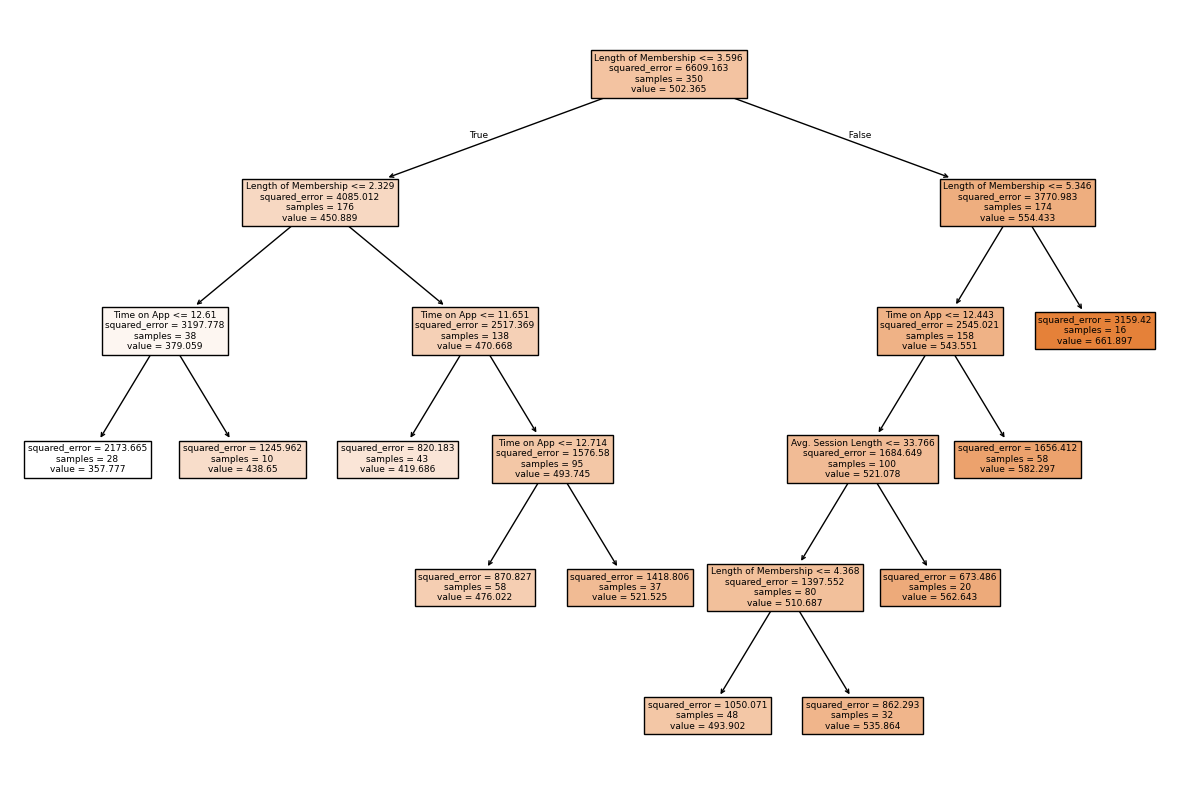

In [33]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(dt,filled=True,feature_names=X.columns)
plt.show()